In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns

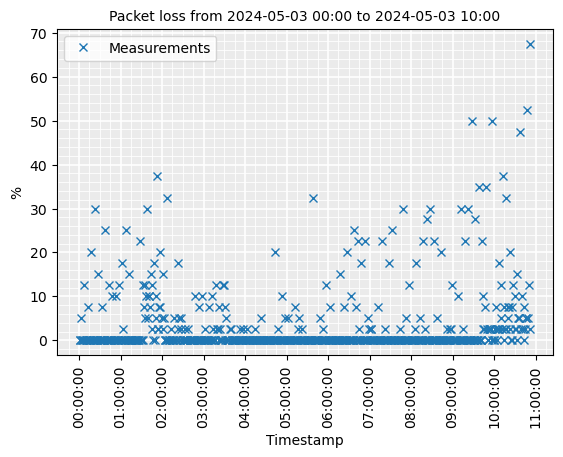

In [4]:
#Date formatting
dateBegin1 = '2024-05-03 00'
dateEnd1 = '2024-05-03 10'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')
dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')

#Csv-file import
file2 = 'pingpacketloss.csv'
df2 = pd.read_csv(file2)
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2 = df2.set_index('Timestamp')

#Data range
date_range2 = df2.loc[dateBegin1:dateEnd1]
packetloss = pd.to_numeric(date_range2['Packetloss'])


#Plot
fig, ax = plt.subplots()
packetloss.plot(ax=ax,ls='', marker='x')
title_str = f'Packet loss from {dateBegin1_str} to {dateEnd1_str}'
plt.ylabel('%')
plt.title(title_str, fontsize=10)
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=1.2)
ax.grid(which='minor', color='white', linewidth=0.6)
ax.minorticks_on()
ax.legend(['Measurements'])
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
for label in ax.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
ax.tick_params(which='minor', bottom=False, left=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4f4d1e4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4f4d1e9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4f4d1e200>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4f4d1ef20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4f4d1f1c0>],
 'means': []}

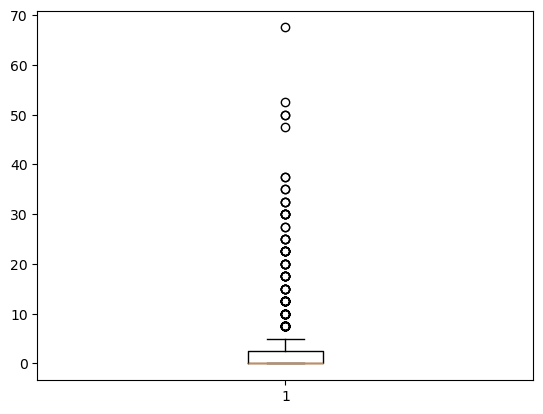

In [5]:
plt.boxplot(packetloss)